In [2]:
# Import statements
import numpy as numpy
import pandas as pd
import seaborn as sns #for plotting
import matplotlib.pyplot as plt
import random

In [3]:
# Define datasets for individual inhibitory checkpoints
data = pd.read_csv('data/ab_ag.tsv', sep='\t')
pd1 = data[data['compound'].str.contains('PD-1', na=False)]
pdl1 = data[data['compound'].str.contains('PD-L1', na=False)]
ctla4 = data[data['compound'].str.contains('CTLA-4', na=False)]
kir = data[data['compound'].str.contains('KIR', na=False)]
lag3 = data[data['compound'].str.contains('LAG', na=False)]
tim3 = data[data['compound'].str.contains('TIM3', na=False)]

In [4]:
# Filter out necessary columns
pd1 = pd1[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
pdl1 = pdl1[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
ctla4 = ctla4[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
kir = kir[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
lag3 = lag3[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
tim3 = tim3[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]

In [5]:
combined_dataset = [pdl1, pd1, ctla4, kir, lag3, tim3]

# Shuffle the list randomly
random.shuffle(combined_dataset)

# Concatenate them in the new random order
merged_df = pd.concat(combined_dataset, ignore_index=True)
shuffled_df = merged_df.sample(frac=1).reset_index(drop=True)

In [6]:
shuffled_df = shuffled_df[shuffled_df['resolution'] < 3.5]
shuffled_df = shuffled_df.dropna()

In [7]:
l = ['CTLA-4', 'TIM3', 'PD-1', 'PD-L1', 'KIR', 'LAG3']

new_df = pd.DataFrame(index = l)

for item in l:
    count = shuffled_df[shuffled_df['compound'].str.contains(item, na=False)].shape[0]
    new_df.loc[item, 'count'] = count

new_df = new_df.reset_index()
new_df.columns = ['checkpoint', 'count'] 

In [8]:
# 1. Filter all relevant rows: those with 'mab' OR 'M6903'
ab_mask = shuffled_df['compound'].str.contains('mab|M6903', na=False, case=False)
shuffled_df_ab = shuffled_df[ab_mask]

# 2. Extract antibody names
shuffled_df_ab['antibody'] = shuffled_df_ab['compound'].str.extract(r'\b(\w*mab)\b', expand=False)

# 3. Fill in M6903 manually where missing
m6903_mask = shuffled_df_ab['compound'].str.contains('M6903', na=False)
shuffled_df_ab.loc[m6903_mask, 'antibody'] = shuffled_df_ab.loc[m6903_mask, 'antibody'].fillna('M6903')

# # 4. Extract checkpoint names
checkpoints_pattern = r'\b(PD-1|PD-L1|CTLA-4|KIR2DL3|TIM3)\b'
shuffled_df_ab['checkpoint'] = shuffled_df_ab['compound'].str.extract(checkpoints_pattern, expand=False)

# # 5. Final formatting
shuffled_df_ab = shuffled_df_ab[['antibody', 'checkpoint', 'pdb', 'Hchain', 'Lchain', 'antigen_chain']]
shuffled_df_ab['antibody'] = shuffled_df_ab['antibody'].str.upper()

shuffled_df_ab


/var/folders/4b/v_2x0lss5_bfxdnbx8y02n6r0000gn/T/ipykernel_51376/2002865464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shuffled_df_ab['antibody'] = shuffled_df_ab['compound'].str.extract(r'\b(\w*mab)\b', expand=False)
/var/folders/4b/v_2x0lss5_bfxdnbx8y02n6r0000gn/T/ipykernel_51376/2002865464.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shuffled_df_ab['checkpoint'] = shuffled_df_ab['compound'].str.extract(checkpoints_pattern, expand=False)


,antibody,checkpoint,pdb,Hchain,Lchain,antigen_chain
2,TISLELIZUMAB,PD-1,7cgw,H,L,P
3,IPILIMUMAB,CTLA-4,9dq4,H,L,A
5,IPILIMUMAB,CTLA-4,7su0,H,L,C
6,CEMIPLIMAB,PD-1,8gy5,A,B,Q
7,PEMBROLIZUMAB,PD-1,5b8c,B,A,C
9,ATEZOLIZUMAB,PD-L1,5xxy,H,L,A
11,ATEZOLIZUMAB,PD-L1,5x8l,J,O,E
15,CAMRELIZUMAB,PD-1,7cu5,B,B,E
16,M6903,TIM3,6txz,J,N,C
17,NaN,NaN,6k0y,A,B,C


In [9]:
pdb_list = shuffled_df_ab['pdb'].unique().tolist()
#shuffled_df_ab['antibody'] = shuffled_df_ab['antibody'].str.upper()

with open('pdb_list.txt', 'w') as f:
    for pdb in pdb_list:
        f.write(pdb + '\n')

# Epitope Mapping and Interface Area Try-Out

In [10]:
# nicht generalisierter Code 
from pymol import cmd

# Input 
pdb_file = "7cu5.pdb"           # Replace with your file path
antibody_chains = "Q"         # Replace with your antibody chains
antigen_chain = "A"             # Replace with your antigen chain
cutoff_distance = 5.0           # Distance cutoff in Å

# Load structure 
cmd.reinitialize()
cmd.load(pdb_file)

# Define selections
cmd.select("antibody", f"chain {antibody_chains}")
cmd.select("antigen", f"chain {antigen_chain}")

# Epitope: antigen residues near antibody 
cmd.select("epitope", f"antigen within {cutoff_distance} of antibody")

epitope_area = cmd.get_area("epitope")
print(f"Epitope surface area: {epitope_area:.2f} Å²")

# Visualization
cmd.show("cartoon", "all")
cmd.show("sticks", "epitope")
cmd.color("yellow", "epitope")
cmd.label("epitope", "resn + resi")

# Save session
output_name = pdb_file.replace(".pdb", "_epitope.pse")
cmd.save(output_name)
print(f"Epitope mapping done. Saved session as {output_name}")


Epitope surface area: 845.33 Å²
Epitope mapping done. Saved session as 7cu5_epitope.pse


# List of PDBS and Chains

In [11]:
# make a list of the columns 
shuffled_df_ab = shuffled_df_ab[['pdb', 'Hchain', 'Lchain', 'antigen_chain']]
extracted_list = shuffled_df_ab.values.tolist()

extracted_list


[['7cgw', 'H', 'L', 'P'],
 ['9dq4', 'H', 'L', 'A'],
 ['7su0', 'H', 'L', 'C'],
 ['8gy5', 'A', 'B', 'Q'],
 ['5b8c', 'B', 'A', 'C'],
 ['5xxy', 'H', 'L', 'A'],
 ['5x8l', 'J', 'O', 'E'],
 ['7cu5', 'B', 'B', 'E'],
 ['6txz', 'J', 'N', 'C'],
 ['6k0y', 'A', 'B', 'C'],
 ['6rp8', 'H', 'L', 'C'],
 ['6txz', 'H', 'L', 'A'],
 ['6txz', 'K', 'O', 'D'],
 ['7bxa', 'B', 'C', 'A'],
 ['5ggr', 'A', 'B', 'Y'],
 ['5b8c', 'E', 'D', 'F'],
 ['7su0', 'I', 'M', 'D'],
 ['5x8l', 'S', 'N', 'D'],
 ['5x8l', 'G', 'L', 'B'],
 ['5xj3', 'A', 'B', 'C'],
 ['7su1', 'H', 'L', 'C'],
 ['7cgw', 'A', 'B', 'C'],
 ['7cu5', 'A', 'A', 'Q'],
 ['7wvm', 'C', 'D', 'F'],
 ['5wt9', 'H', 'L', 'G'],
 ['5xj4', 'H', 'L', 'A'],
 ['7wvm', 'A', 'B', 'E'],
 ['5x8l', 'F', 'K', 'A'],
 ['7bxa', 'H', 'L', 'P'],
 ['5xj3', 'J', 'K', 'L'],
 ['5xj3', 'G', 'H', 'I'],
 ['5grj', 'H', 'L', 'A'],
 ['6txz', 'I', 'M', 'B'],
 ['5x8l', 'H', 'M', 'C'],
 ['9dq3', 'H', 'L', 'C'],
 ['5ggr', 'H', 'L', 'Z'],
 ['5jxe', 'G', 'F', 'A'],
 ['5jxe', 'D', 'C', 'B'],
 ['7wsl', 'H

# Surface Area, H-Bonds and Salt Bridges

In [12]:
import os
from pymol import cmd
import pandas as pd

results = []

# input 
root_folder = "structures"
cutoff_distance = 5.0  # in Å distance
hbond_cutoff = 3.5  # in Å distance for hydrogen bonds
salt_cutoff = 4.0  # in Å distance for salt bridges

# Ensure extracted_list is defined
if 'extracted_list' not in locals():
    extracted_list = []  # Replace with actual data if available

# Your extracted list from your DataFrame Format: [pdb_id, H_chain, L_chain, antigen_chain]

# Loop over each chain combination from the extracted list
for pdb_id, h_chain, l_chain, ag_chain in extracted_list:
    pdb_path = None
    for dirpath, _, filenames in os.walk(root_folder):
        for file in filenames:
            if file.lower() == f"{pdb_id.lower()}.pdb":
                pdb_path = os.path.join(dirpath, file)
                break
        if pdb_path:
            break

    if not pdb_path:
        print(f"Skipping {pdb_id}: PDB file not found")
        continue
    else:
        print(f"Processing {pdb_id}...")

        cmd.reinitialize()
        cmd.load(pdb_path)

        # Selections
        cmd.select("antibody", f"chain {h_chain}+{l_chain}")
        cmd.select("antigen", f"chain {ag_chain}")
        cmd.select("epitope", f"antigen within {cutoff_distance} of antibody")

        # Color antibody chains 
        cmd.color("marine", f"chain {h_chain}")
        cmd.color("skyblue", f"chain {l_chain}")

        # Color antigen chain (e.g., salmon)
        cmd.color("salmon", "antigen")

        # Optional: highlight epitope (already near antigen)
        cmd.color("yellow", "epitope")

        # Surface area
        epitope_area = cmd.get_area("epitope")
        print(f"   ➤ Epitope surface area: {epitope_area:.2f} Å²")

        # Hydrogen bonds
        hbonds = cmd.find_pairs("antibody", "antigen", mode=1, cutoff=hbond_cutoff)
        num_hbonds = len(hbonds)
        print(f"Found {num_hbonds} hydrogen bonds at the interface.")

        # salt bridges 
        # 1) antibody acidic O  → antigen basic N
        cmd.select("acidic_ab", f"chain {h_chain}+{l_chain} and resn ASP+GLU "
                                "and name OD1+OD2+OE1+OE2")
        cmd.select("basic_ag",  f"chain {ag_chain} and resn LYS+ARG+HIS "
                                "and name NZ+NH1+NH2+ND1+NE2")
        sb1 = cmd.find_pairs("acidic_ab", "basic_ag", cutoff=salt_cutoff, mode=1)

        # 2) antigen acidic O → antibody basic N
        cmd.select("acidic_ag", f"chain {ag_chain} and resn ASP+GLU "
                                "and name OD1+OD2+OE1+OE2")
        cmd.select("basic_ab",  f"chain {h_chain}+{l_chain} and resn LYS+ARG+HIS "
                                "and name NZ+NH1+NH2+ND1+NE2")
        sb2 = cmd.find_pairs("acidic_ag", "basic_ab", cutoff=salt_cutoff, mode=1)

        # cleanup salt-bridge selections
        for sel in ("acidic_ab","basic_ag","acidic_ag","basic_ab"):
            cmd.delete(sel)

        num_salt_bridges = len(sb1) + len(sb2)
        print(f"   ➤ Salt bridges: {num_salt_bridges}")

        # save session (optional) 
        session_out = os.path.join(dirpath, f"{pdb_id}_epitope.pse")
        cmd.save(session_out)

        # collect results 
        results.append({
            "pdb_id":              pdb_id,
            "H_chain":             h_chain,
            "L_chain":             l_chain,
            "antigen_chain":       ag_chain,
            "epitope_area":     epitope_area,
            "num_hydrogen_bonds":  num_hbonds,
            "num_salt_bridges":    num_salt_bridges,
            "folder":              os.path.basename(dirpath)
        })

# Save to CSV
df = pd.DataFrame(results)
# Remove duplicate block
# Save results to CSV 
df = pd.DataFrame(results)
df.to_csv("epitope_surface_hbonds_summary.csv", index=False)

print("All done. Results saved to 'epitope_surface_hbonds_summary.csv'")

Processing 7cgw...
   ➤ Epitope surface area: 1545.61 Å²
Found 29 hydrogen bonds at the interface.
   ➤ Salt bridges: 2
Processing 9dq4...
   ➤ Epitope surface area: 2228.43 Å²
Found 212 hydrogen bonds at the interface.
   ➤ Salt bridges: 3
Processing 7su0...
   ➤ Epitope surface area: 1579.15 Å²
Found 15 hydrogen bonds at the interface.
   ➤ Salt bridges: 1
Processing 8gy5...
   ➤ Epitope surface area: 1015.82 Å²
Found 16 hydrogen bonds at the interface.
   ➤ Salt bridges: 0
Processing 5b8c...
   ➤ Epitope surface area: 1872.03 Å²
Found 32 hydrogen bonds at the interface.
   ➤ Salt bridges: 0
Processing 5xxy...
   ➤ Epitope surface area: 2262.73 Å²
Found 188 hydrogen bonds at the interface.
   ➤ Salt bridges: 0
Processing 5x8l...
   ➤ Epitope surface area: 1705.83 Å²
Found 29 hydrogen bonds at the interface.
   ➤ Salt bridges: 0
Processing 7cu5...
   ➤ Epitope surface area: 713.16 Å²
Found 8 hydrogen bonds at the interface.
   ➤ Salt bridges: 0
Processing 6txz...
   ➤ Epitope surface 

In [13]:
import pandas as pd

df = pd.read_csv("epitope_surface_hbonds_summary.csv")
print(df['pdb_id'].value_counts())

pdb_id
5x8l    5
5b8c    4
6txz    4
5xj3    4
7cgw    2
7su0    2
8gy5    2
5ggs    2
7cu5    2
5jxe    2
6rp8    2
7bxa    2
5ggr    2
5tru    2
7wvm    2
5ggv    1
8tui    1
6xkr    1
7wsl    1
7su1    1
9dq3    1
5grj    1
5xj4    1
5wt9    1
9dq4    1
6k0y    1
5xxy    1
5x8m    1
Name: count, dtype: int64


# Plots

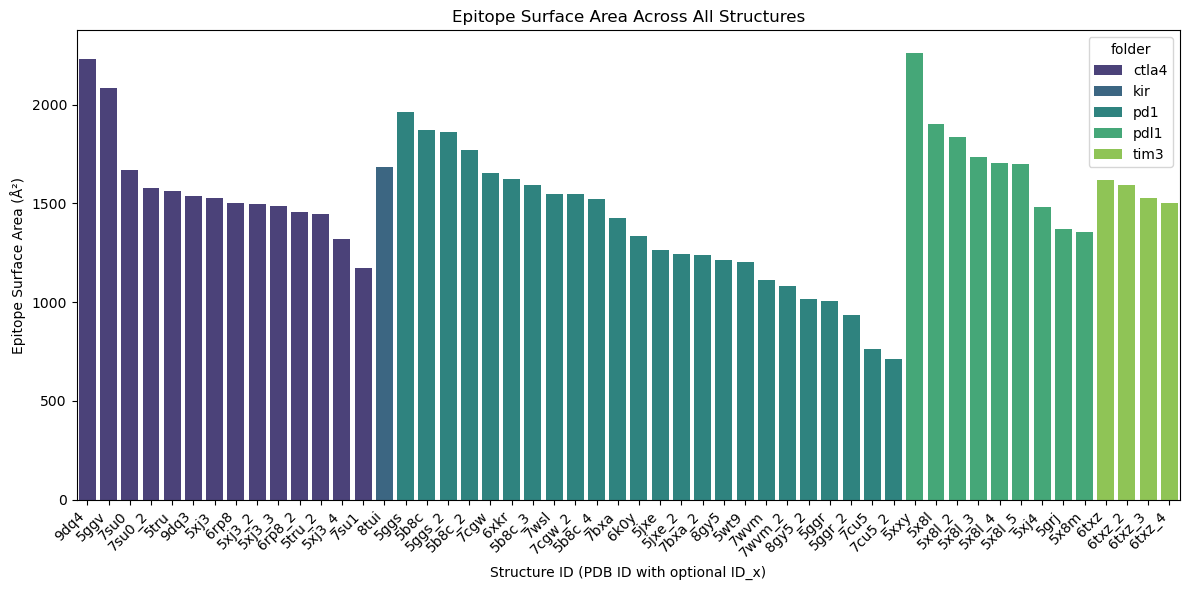

In [18]:
from collections import defaultdict

# Sort as before
df_sorted = df.sort_values(by=["folder", "epitope_area"], ascending=[True, False]).copy()

# Generate structure_id with numbered suffixes if needed
id_counts = defaultdict(int)
structure_ids = []

for pdb_id in df_sorted["pdb_id"]:
    id_counts[pdb_id] += 1
    suffix = f"_{id_counts[pdb_id]}" if id_counts[pdb_id] > 1 else ""
    structure_ids.append(pdb_id + suffix)

df_sorted["structure_id"] = structure_ids

# Plotting (same as before)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x="structure_id", y="epitope_area", hue="folder", dodge=False, palette="viridis")

plt.title("Epitope Surface Area Across All Structures")
plt.xlabel("Structure ID (PDB ID with optional ID_x)")
plt.ylabel("Epitope Surface Area (Å²)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



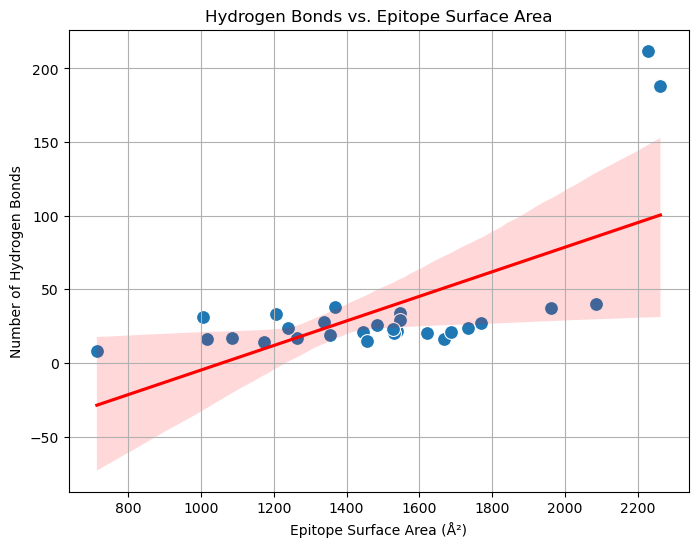

In [ ]:
df = pd.read_csv("epitope_surface_hbonds_summary.csv")

# Scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="epitope_area", y="num_hydrogen_bonds", s=100)
sns.regplot(data=df, x="epitope_area", y="num_hydrogen_bonds", scatter=False, color="red")
plt.xlabel("Epitope Surface Area (Å²)")
plt.ylabel("Number of Hydrogen Bonds")
plt.title("Hydrogen Bonds vs. Epitope Surface Area")
plt.grid(True)
plt.show()

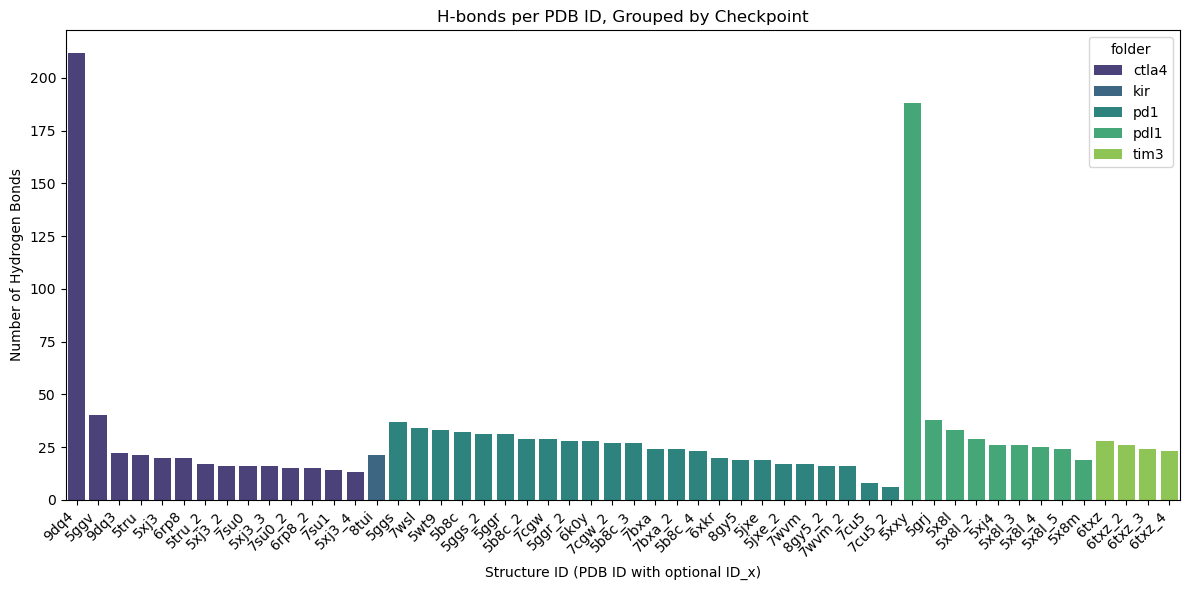

In [125]:
from collections import defaultdict

# Sort as before
df_sorted = df.sort_values(by=["folder", "num_hydrogen_bonds"], ascending=[True, False]).copy()

# Generate structure_id with numbered suffixes if needed
id_counts = defaultdict(int)
structure_ids = []

for pdb_id in df_sorted["pdb_id"]:
    id_counts[pdb_id] += 1
    suffix = f"_{id_counts[pdb_id]}" if id_counts[pdb_id] > 1 else ""
    structure_ids.append(pdb_id + suffix)

df_sorted["structure_id"] = structure_ids

# Plotting (same as before)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x="structure_id", y="num_hydrogen_bonds", hue="folder", dodge=False, palette="viridis")

plt.title("H-bonds per PDB ID, Grouped by Checkpoint")
plt.xlabel("Structure ID (PDB ID with optional ID_x)")
plt.ylabel("Number of Hydrogen Bonds")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

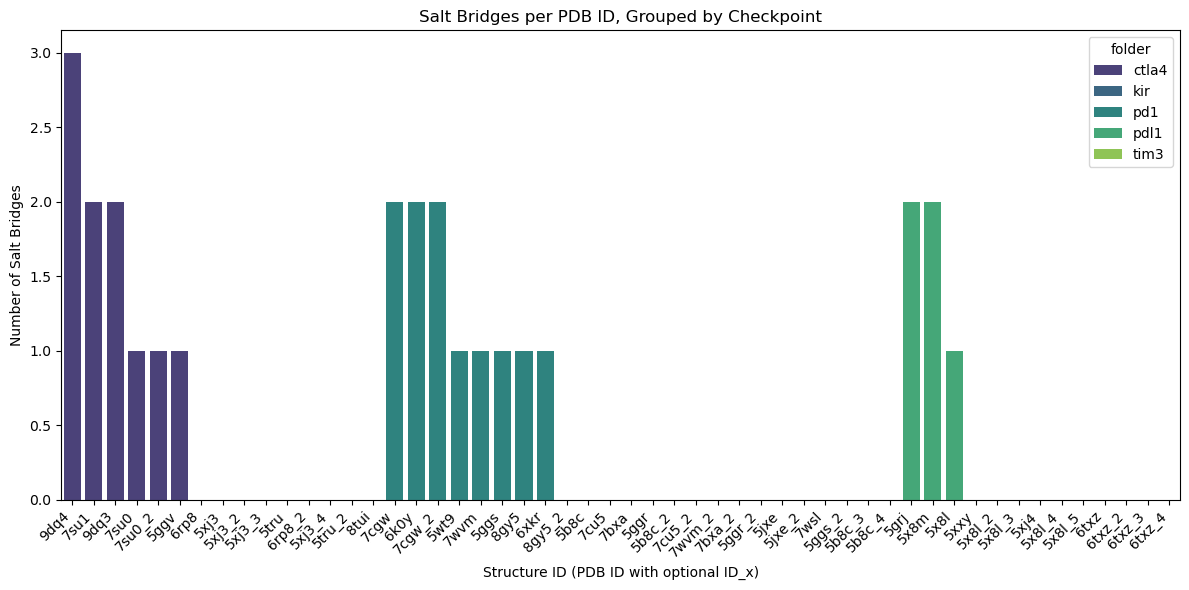

In [19]:
from collections import defaultdict

# Sort as before
df_sorted = df.sort_values(by=["folder", "num_salt_bridges"], ascending=[True, False]).copy()

# Generate structure_id with numbered suffixes if needed
id_counts = defaultdict(int)
structure_ids = []

for pdb_id in df_sorted["pdb_id"]:
    id_counts[pdb_id] += 1
    suffix = f"_{id_counts[pdb_id]}" if id_counts[pdb_id] > 1 else ""
    structure_ids.append(pdb_id + suffix)

df_sorted["structure_id"] = structure_ids

# Plotting (same as before)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x="structure_id", y="num_salt_bridges", hue="folder", dodge=False, palette="viridis")

plt.title("Salt Bridges per PDB ID, Grouped by Checkpoint")
plt.xlabel("Structure ID (PDB ID with optional ID_x)")
plt.ylabel("Number of Salt Bridges")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Binding Affinity Score

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#normalizing
scaler = MinMaxScaler()
df = pd.read_csv("epitope_surface_hbonds_summary.csv")
features = df[["num_hydrogen_bonds", "num_salt_bridges", "epitope_area"]]
normalized = scaler.fit_transform(features)

df_norm = pd.DataFrame(normalized, columns=features.columns)
df_norm["pdb_id"] = df["pdb_id"]  

# Create a binding strength score
weights = {
    "num_hydrogen_bonds": 0.4,
    "num_salt_bridges": 0.4,
    "epitope_area": 0.2
}

df_norm["binding_score"] = (
    df_norm["num_hydrogen_bonds"] * weights["num_hydrogen_bonds"] +
    df_norm["num_salt_bridges"] * weights["num_salt_bridges"] +
    df_norm["epitope_area"] * weights["epitope_area"]
)

# Show top binders
print(df_norm.sort_values("binding_score", ascending=False)[["pdb_id", "binding_score"]])



   pdb_id  binding_score
1    9dq4       0.995573
5    5xxy       0.553398
21   7cgw       0.428643
0    7cgw       0.418769
31   5grj       0.413341
34   9dq3       0.404239
9    6k0y       0.389920
41   5ggv       0.376486
47   5x8m       0.374642
20   7su1       0.341447
40   5ggs       0.330068
17   5x8l       0.300010
46   6xkr       0.277807
16   7su0       0.276012
2    7su0       0.262581
24   5wt9       0.249232
43   8gy5       0.222825
39   5ggs       0.221307
26   7wvm       0.204578
4    5b8c       0.200059
33   5x8l       0.197171
27   5x8l       0.190328
15   5b8c       0.177156
6    5x8l       0.172782
18   5x8l       0.166189
38   7wsl       0.161927
12   6txz       0.159394
48   5b8c       0.158367
45   8tui       0.154640
11   6txz       0.152117
8    6txz       0.138244
25   5xj4       0.138094
50   5b8c       0.137617
32   6txz       0.136912
49   5xj3       0.132534
51   5tru       0.130823
10   6rp8       0.128708
13   7bxa       0.126700
42   5tru       0.123491


<Figure size 640x480 with 0 Axes>

/var/folders/vf/ygq5vvrx3fbcsv9n_5277nmr0000gn/T/ipykernel_85361/2080636787.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap("viridis")


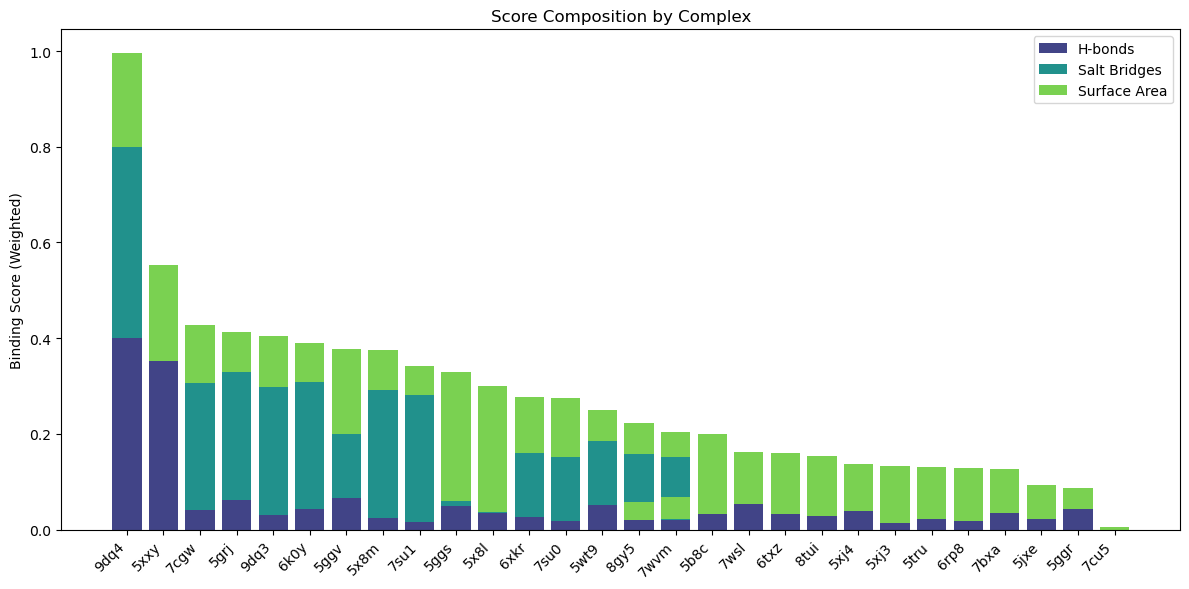

In [128]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Sort by binding score
top = df_norm.sort_values("binding_score", ascending=False)

# Get 3 distinct colors from the viridis colormap
viridis = cm.get_cmap("viridis")
colors = viridis(np.linspace(0.2, 0.8, 3))  # evenly spaced colors for 3 components

plt.figure(figsize=(12, 6))

# Plot H-bonds
plt.bar(
    top["pdb_id"],
    top["num_hydrogen_bonds"] * 0.4,
    label="H-bonds",
    color=colors[0],
    bottom=0
)

# Plot Salt Bridges
plt.bar(
    top["pdb_id"],
    top["num_salt_bridges"] * 0.4,
    label="Salt Bridges",
    color=colors[1],
    bottom=top["num_hydrogen_bonds"] * 0.4
)

# Plot Surface Area
plt.bar(
    top["pdb_id"],
    top["epitope_area"] * 0.2,
    label="Surface Area",
    color=colors[2],
    bottom=(top["num_hydrogen_bonds"] + top["num_salt_bridges"]) * 0.4
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Binding Score (Weighted)")
plt.title("Score Composition by Complex")
plt.legend()
plt.tight_layout()
plt.savefig('plots/epitope_binding_affinity_score.pdf', bbox_inches='tight')
plt.show()

# Sequences

In [20]:
import os
from pymol import cmd
from Bio.SeqUtils import seq1 # 

# same as the code above
root_folder = "structures"         # Folder with your PDB files
cutoff_distance = 5.0              # Å distance for epitope definition
output_fasta = "epitope_sequences.fasta"


pdb_chain_dict = {entry[0].lower(): entry[1:] for entry in extracted_list}
sequences = []

# 
for dirpath, _, filenames in os.walk(root_folder):
    for file in filenames:
        if not file.endswith(".pdb"):
            continue

        pdb_id = file.replace(".pdb", "").lower()
        pdb_path = os.path.join(dirpath, file)

        if pdb_id not in pdb_chain_dict:
            print(f"⚠️ Skipping {pdb_id}: chain info not found.")
            continue

        h_chain, l_chain, ag_chain = pdb_chain_dict[pdb_id]
        print(f"🔍 Processing {pdb_id}...")

        cmd.reinitialize()
        cmd.load(pdb_path)

        # Define selection
        cmd.select("antibody", f"chain {h_chain}+{l_chain}")
        cmd.select("antigen", f"chain {ag_chain}")
        cmd.select("epitope", f"antigen within {cutoff_distance} of antibody")

        # Extract residue sequence from epitope
        model = cmd.get_model("epitope")
        seen = set()
        residues = []
        for atom in model.atom:
            res_id = (atom.chain, atom.resi)
            if res_id not in seen:
                seen.add(res_id)
                residues.append(atom.resn)

        sequence = ''.join(seq1(res) for res in residues if res != "HOH")
        sequences.append((pdb_id, sequence))

# Save FASTA file 
with open(output_fasta, "w") as f:
    for pdb_id, seq in sequences:
        f.write(f">{pdb_id}\n{seq}\n")

print(f"Epitope sequences saved to: {output_fasta}")


⚠️ Skipping 7tzh: chain info not found.
⚠️ Skipping 7tzg: chain info not found.
⚠️ Skipping 7dv4: chain info not found.
🔍 Processing 5tru...
⚠️ Skipping 6xy2: chain info not found.
🔍 Processing 7su0...
🔍 Processing 7su1...
⚠️ Skipping 7elx: chain info not found.
⚠️ Skipping 9dq5: chain info not found.
🔍 Processing 9dq4...
🔍 Processing 9dq3...
🔍 Processing 6rp8...
🔍 Processing 5xj3...
🔍 Processing 5ggv...
🔍 Processing 8gy5...
🔍 Processing 5b8c...
🔍 Processing 7wvm...
🔍 Processing 5jxe...
⚠️ Skipping 8u32: chain info not found.
⚠️ Skipping 8u31: chain info not found.
🔍 Processing 6xkr...
🔍 Processing 6k0y...
⚠️ Skipping 8as0: chain info not found.
⚠️ Skipping 7e9b: chain info not found.
🔍 Processing 7cu5...
🔍 Processing 7wsl...
🔍 Processing 5ggr...
🔍 Processing 5wt9...
🔍 Processing 5ggs...
🔍 Processing 7bxa...
⚠️ Skipping 6jjp: chain info not found.
🔍 Processing 7cgw...
🔍 Processing 8tui...
🔍 Processing 6txz...
🔍 Processing 5grj...
⚠️ Skipping 8rpb: chain info not found.
⚠️ Skipping 7yds

In [21]:
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML
from Bio import SeqIO
import time

# input file: epitope sequences
input_file = "epitope_sequences.fasta"
output_file = "blast_summary.txt"

# Open output text file
with open(output_file, "w") as out:
    # Loop through all sequences in the FASTA file
    for record in SeqIO.parse(input_file, "fasta"):
        print(f"Running BLAST for {record.id}...")

        # Send sequence to NCBI BLAST (protein database)
        result = NCBIWWW.qblast("blastp", "nr", record.seq)

        # Read the result from NCBI
        blast_record = NCBIXML.read(result)

        # Save top 3 hits for this sequence
        out.write(f"\n=== {record.id} ===\n")
        for hit in blast_record.alignments[:3]:
            hsp = hit.hsps[0]
            out.write(f"- Hit: {hit.title}\n")
            out.write(f"  Identity: {hsp.identities}/{hsp.align_length}\n")
            out.write(f"  E-value: {hsp.expect}\n")

        # Wait 3 seconds ???
        time.sleep(3)

print("Results are saved in 'blast_summary.txt'")


Running BLAST for 5tru...
Running BLAST for 7su0...
Running BLAST for 7su1...
Running BLAST for 9dq4...
Running BLAST for 9dq3...
Running BLAST for 6rp8...
Running BLAST for 5xj3...
Running BLAST for 5ggv...
Running BLAST for 8gy5...
Running BLAST for 5b8c...
Running BLAST for 7wvm...
Running BLAST for 5jxe...
Running BLAST for 6xkr...
Running BLAST for 6k0y...
Running BLAST for 7cu5...
Running BLAST for 7wsl...
Running BLAST for 5ggr...
Running BLAST for 5wt9...
Running BLAST for 5ggs...
Running BLAST for 7bxa...
Running BLAST for 7cgw...
Running BLAST for 8tui...
Running BLAST for 6txz...
Running BLAST for 5grj...


/opt/anaconda3/envs/pymol-env/lib/python3.9/site-packages/Bio/Blast/NCBIWWW.py:275: BiopythonWarning: BLAST request 53K29CK5016 is taking longer than 10 minutes, consider re-issuing it
  warnings.warn(


KeyboardInterrupt: 

# Test BLAST

In [22]:
from Bio import SeqIO
from Bio.Blast import NCBIWWW
import time

# Load first 3 sequences from your FASTA file 
input_file = "epitope_sequences.fasta"
records = list(SeqIO.parse(input_file, "fasta"))[:3]  # Only first 3

for record in records:
    print(f"🔬 Running BLAST for {record.id}...")

    # Run BLASTP on NCBI's non-redundant database
    result_handle = NCBIWWW.qblast("blastp", "nr", record.seq)

    # Save raw BLAST output as XML
    output_filename = f"blast_{record.id}.xml"
    with open(output_filename, "w") as f:
        f.write(result_handle.read())

    print(f"Saved BLAST result to {output_filename}")
    time.sleep(3)  


🔬 Running BLAST for 5tru...
Saved BLAST result to blast_5tru.xml
🔬 Running BLAST for 7su0...
Saved BLAST result to blast_7su0.xml
🔬 Running BLAST for 7su1...
Saved BLAST result to blast_7su1.xml


# Test without BLAST

In [ ]:
from Bio import SeqIO # to read sequences from a FASTA file
from Bio import pairwise2 # pairwise sequence alignments
import pandas as pd

# Load your sequences
records = list(SeqIO.parse("epitope_sequences.fasta", "fasta"))

# Initialize identity matrix
matrix = []

# Compare each pair
for r1 in records:
    row = []
    for r2 in records:
        alignments = pairwise2.align.globalxx(r1.seq, r2.seq) # Align two sequences (whole sequence)
        best = alignments[0]
        identity = best.score / max(len(r1.seq), len(r2.seq)) * 100  # identiy in % -> (number of matches) / (length of longer sequence) × 100
        row.append(round(identity, 2))
    matrix.append(row)

# Create a DataFrame
ids = [rec.id for rec in records]
df = pd.DataFrame(matrix, index=ids, columns=ids)

# Save & show
df.to_csv("epitope_sequence_comparison_matrix.csv")
print(" Sequence identity matrix saved to 'epitope_sequence_comparison_matrix.csv'")
print(df)


/opt/anaconda3/envs/pymol-env/lib/python3.9/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


 Sequence identity matrix saved to 'epitope_sequence_comparison_matrix.csv'
        5tru    7su0    7su1    9dq4    9dq3    6rp8    5xj3    5ggv    8gy5  \
5tru  100.00   88.46   64.00   50.00   80.00   88.00   76.00   70.97   28.00   
7su0   88.46  100.00   69.23   56.25   84.62   84.62   76.92   70.97   26.92   
7su1   64.00   69.23  100.00   40.62   73.91   69.57   77.27   61.29   27.27   
9dq4   50.00   56.25   40.62  100.00   53.12   50.00   50.00   59.38   18.75   
9dq3   80.00   84.62   73.91   53.12  100.00   91.30   78.26   70.97   30.43   
6rp8   88.00   84.62   69.57   50.00   91.30  100.00   82.61   67.74   30.43   
5xj3   76.00   76.92   77.27   50.00   78.26   82.61  100.00   64.52   27.27   
5ggv   70.97   70.97   61.29   59.38   70.97   67.74   64.52  100.00   29.03   
8gy5   28.00   26.92   27.27   18.75   30.43   30.43   27.27   29.03  100.00   
5b8c   27.59   27.59   27.59   21.88   27.59   31.03   27.59   35.48   68.97   
7wvm   28.00   26.92   30.00   18.75   30.43

# Plotting

/var/folders/4b/v_2x0lss5_bfxdnbx8y02n6r0000gn/T/ipykernel_45038/593474188.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = df.applymap(lambda x: f"{x:.0f}")


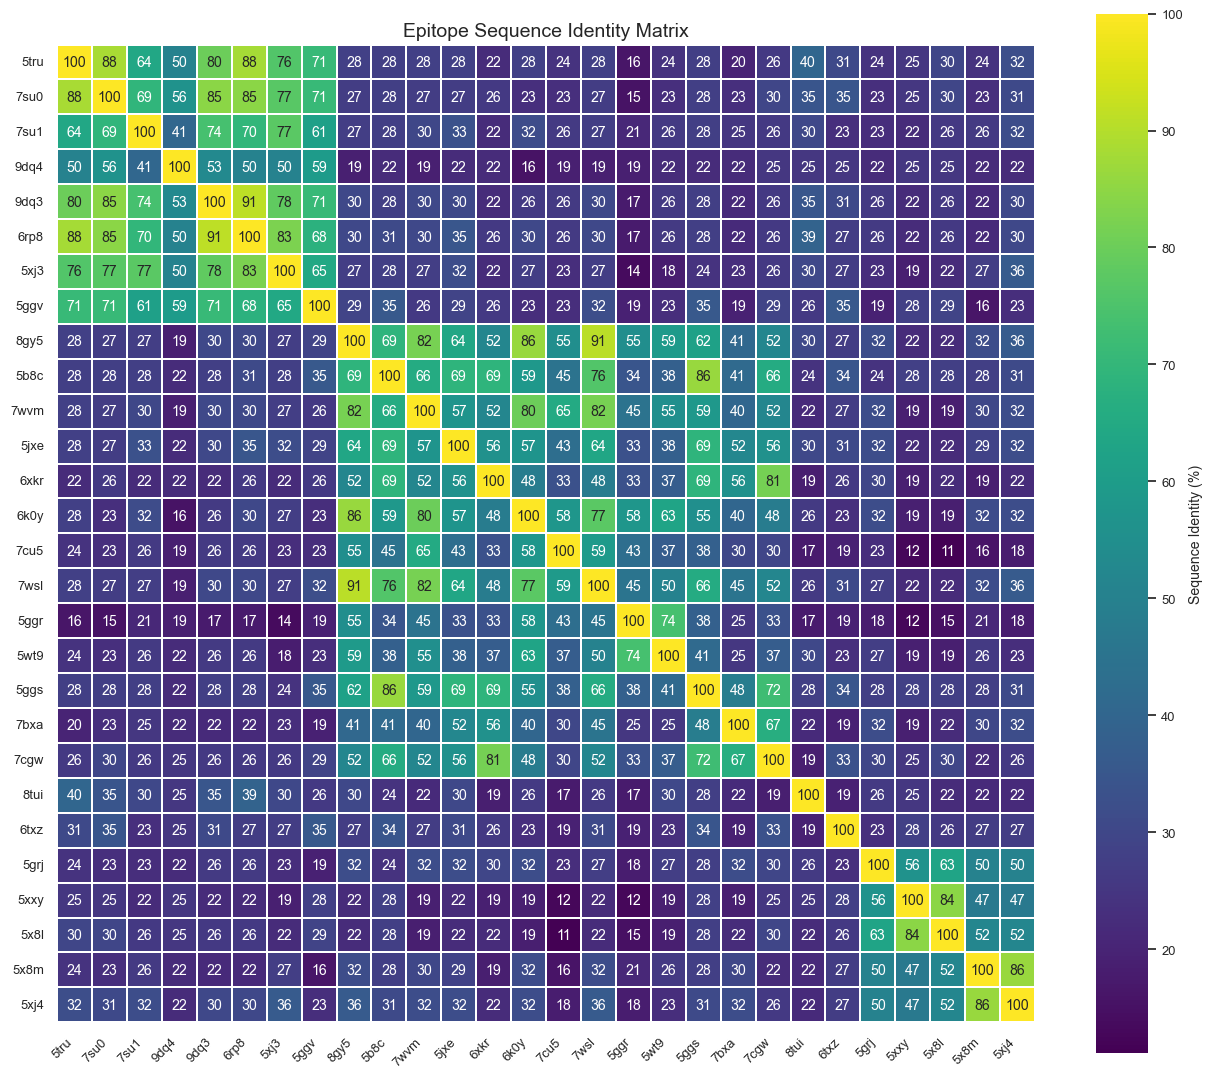

Cleaned-up heatmap saved as 'epitope_identity_heatmap_final.png'


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


annot_data = df.applymap(lambda x: f"{x:.0f}")
mask = None

plt.figure(figsize=(13, 11))
sns.set(style="white", font_scale=0.85)

ax = sns.heatmap(
    df, 
    annot=annot_data, 
    fmt="", 
    cmap="viridis", 
    mask=mask,
    square=True, 
    linewidths=0.3, 
    cbar_kws={"label": "Sequence Identity (%)"}
)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Epitope Sequence Identity Matrix", fontsize=14)
plt.tight_layout()

plt.savefig("epitope_identity_heatmap_final.png", dpi=300)
plt.show()

print("Cleaned-up heatmap saved as 'epitope_identity_heatmap_final.png'")

